# 15_언어 모델(Language Model)
언어 모델(Language Model)이란 단어 시퀀스(문장)에 확률을 할당하는 모델을 말한다. 어떤 문장들이 있을 때, 기계가 이 문장은 적절해! 이 문장은 말이 안 돼!라고 사람처럼 판단할 수 있다면, 기계가 자연어 처리를 잘 한다고 볼 수 있다. 언어모델은 바로 이런 일을 한다.<br>

이 문서에서는 통계에 기반한 전통적인 언어 모델(Statistical Languagel Model, SLM)에 대해서 배운다. 이런 모델은 우리가 실제 사용하는 자연어라고 하기에는 많은 한계가 존재했고, 요즘 들어 인공 신경망이 이러한 한계를 많이 해결하며(GPT, BERT) 통계 기반 언어 모델은 사용 빈도가 많이 줄었다. <br>

하지만 그럼에도 여전히 이런 모델에서 배우게 될 n-gram은 자연어 처리 분야에서 활발하게 활용되고 있으며, 통계 기반 방법론에 대한 이해는 언어 모델에 대한 전체적인 시야를 갖는 데 도움을 준다.

## 1) 언어 모델이란?
다시 설명한다. 언어 모델은 **단어 시퀀스에 확률을 할당(assign)**하는 일을 한다. 이를 조금 풀어서 쓰면, 언어 모델은 가장 자연스러운 단어 시퀀스를 찾아내는 일을 한다고 보면 된다. 단어 시퀀스에 확률을 할당하게 하기 위해 가장 보편적으로 사용되는 방법은 언어 모델이 **이전 단어들이 주어졌을 때, 다음 단어를 예측**하도록 하는 것이다. <br>

이와 다른 유형의 언어 모델로는 주어진 양쪽의 단어들로부터 가운데 비어있는 단어를 예측하도록 하는 것이 있다. 이는 마치 고등학교 모의고사에서 문장의 가운데 단어를 비워놓고 어떤 단어인지 맞추는 빈칸 추론 문제와 비슷하다. 이 유형의 언어 모델은 맨 마지막 BERT 문서에서 다루도록 하고, 그 때까지는 이전 단어들로부터 다음 단어를 예측하는 방식에만 집중하도록 한다.<br>

언어 모델에 -ing를 붙인 언어 모델링(Language Modeling)은 주어진 단어들로부터 아직 모르는 단어를 예측하는 작업을 말한다. <br>

자연어 처리로 유명한 스탠포트대학교에서는 언어 모델을 문법(grammer)라고 비유하기도 한다. 언어 모델이 단어들의 조합이 얼마나 적절한지, 또는 해당 문장이 얼마나 적합한지를 알려주는 일을 하는 것이 마치 문법이 하는 일처럼 보이기 때문이다.

## 2) 단어 시퀀스의 확률 할당
자연어 처리에서 단어 시퀀스에 확률을 할당하는 일이 왜 필요할까? 예를 들어보자. 여기서 대문자 P는 확률을 의미한다. 

### a. 기계 번역(Machine Translation)
P(나는 버스를 탔다) > P(나는 버스를 태운다)<br>
: 언어 모델은 두 문장을 비교하여 좌측 문장의 확률이 더 높다고 판단한다. 여기서 확률은 문장이 문법적으로 정확한 확률을 말한다. 

### b. 오타 교정(Spell Correction) 
선생님이 교실로 부리나케 <br>
P(달려갔다) > P(잘려갔다)<br>
: 언어 모델은 두 문장을 비교하여 좌측 문장의 확률이 더 높다고 판단한다. 

### c. 음성 인식(Speech Recognition) 
P(나는 메롱을 먹는다) < P(나는 메론을 먹는다)<br>
: 언어 모델은 두 문장을 비교하여 우측 문장의 확률이 더 높다고 판단한다. 

<br>

언어 모델은 위의 예시들처럼 확률을 통해 보다 오타가 없고, 문법적으로 적절한 문장을 판단한다. 

## 3) 주어진 이전 단어들로부터 다음 단어 예측하기
언어 모델은 단어 시퀀스에 확률을 할당하는 모델이다. 그리고 단어 시퀀스에 확률을 할당하기 위해 가장 보편적으로 이용하는 방법은 이전 단어들이 주어졌을 때, 다음 단어를 예측하도록 하는 것이다. 이를 조건부 확률로 표현해본다. 

### A. 단어 시퀀스의 확률
하나의 단어를 w, 단어 시퀀스를 대문자 W라고 한다면, n개의 단어가 등장하는 단어 시퀀스 W의 확률은 다음과 같다. <br>

P(W)=P(w1,w2,w3,w4,w5,...,wn)<BR>
    
### B. 다음 단어 등장 확률
이제 다음 단어 등장 확률을 식으로 표현해보자. n-1개의 단어가 나열된 상태에서 n번째 단어의 확률은 다음과 같다.<br>

P(wn|w1,...,wn−1)<br>

|의 기호는 조건부 확률(conditional probability)을 의미한다.<br>
예를 들어 다섯 번째 단어의 확률은 아래와 같다.<br>

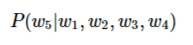<br>

전체 단어 시퀀스 W의 확률은 모든 단어가 예측되고 나서야 알 수 있으므로 단어 시퀀스의 확률은 다음과 같다.

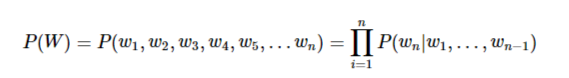

## 4) 언어 모델의 간단한 직관
비행기를 타려고 공항에 갔는데 지각을 하는 바람에 비행기를 [?]라는 문장이 있다. **'비행기를'** 다음에 어떤 단어가 오게 될지 사람들은 쉽게 **'놓쳤다'**라고 예상할 수 있다. 우리 지식에 기반하여 나올 수 있는 여러 단어들을 후보에 놓고 놓쳤다는 단어가 나올 확률이 가장 높다고 판단했기 때문이다.<BR>
    
그렇다면 기계에게 위 문장을 주고, **'비행기를'** 다음에 나올 단어를 예측해보라고 한다면 과연 어떻게 최대한 정확히 예측할 수 있을까? 기계도 비슷하다. 앞에 어떤 단어들이 나왔는지 고려하여 후보가 될 수 있는 여러 단어들에 대해서 확률을 예측해 보고, 가장 높은 확률을 가진 단어를 선택한다. 

## 5) 검색 엔진에서의 언어 모델의 예
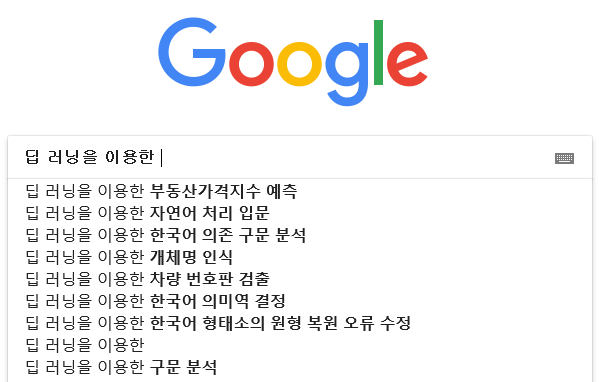<br>
위의 예시는 가장 대표적인 검색 엔진 google이다. 검색 엔진이 입력된 단어들의 나열에 대해서 다음 단어를 예측하는 언어 모델을 사용하고 있다. 